In [12]:
import cobra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import scipy.stats as st

In [13]:
df = pd.read_csv('rates_and_values.csv', index_col=0)
df = df.loc[(df.Species == 'E. coli')]#&(df.Dataset=='SINTEF-23')

# Leakage rates

In [14]:
fn_uptake_rates = '/Users/ssulheim/Library/CloudStorage/OneDrive-UniversitédeLausanne/UNIL/leakage/data/Zampieri_Natcomms_2019/aa_uptake_rates.xlsx'

In [15]:
df_uptake = pd.read_excel(fn_uptake_rates, skiprows=2, index_col=0)

In [16]:
df_uptake.index = [x.strip("'") for x in df_uptake.index]

In [17]:
np.mean([4.2, 2.8, 2.2, 2.1])

2.8249999999999997

In [18]:
mean_uptake = df_uptake.agg([np.nanmean, 'std'], axis = 1)

In [19]:
mean_release = df.groupby('Metabolite').agg({'log10(Rate [mmol/gDW/h])': [np.nanmean, np.nanstd]})['log10(Rate [mmol/gDW/h])']

In [20]:
amino_acids = {
    'Gly': 'Glycine',
    'Ala': 'Alanine',
    'Arg': 'Arginine',
    'Asn': 'Asparagine',
    'Asp': 'Aspartate',
    'Cys': 'Cysteine',
    'Glu': 'Glutamate',
    'Gln': 'Glutamine',
    'His': 'Histidine',
    'Ile': 'Isoleucine',
    'Leu': 'Leucine',
    'Lys': 'Lysine',
    'Met': 'Methionine',
    'Phe': 'Phenylalanine',
    'Pro': 'Proline',
    'Ser': 'Serine',
    'Thr': 'Threonine',
    'Trp': 'Tryptophan',
    'Tyr': 'Tyrosine',
    'Val': 'Valine'
}


In [24]:
colors = sns.color_palette('tab20')

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Cys Cysteine


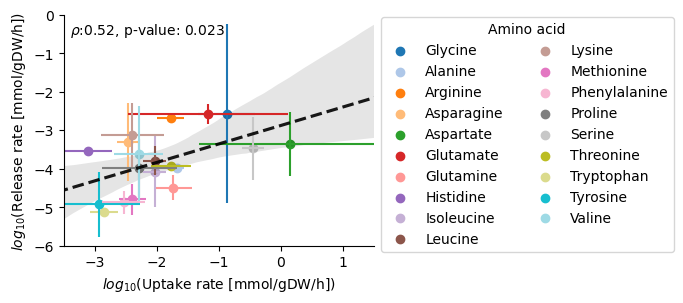

In [36]:
fig, ax = plt.subplots(1, figsize = (4,3))
mean_uptake_dict = mean_uptake.to_dict(orient = 'index')
mean_release_dict = mean_release.to_dict(orient = 'index')
data = []
for i, (aa, aa_name) in enumerate(amino_acids.items()):
    uptake = mean_uptake_dict[aa]
    if mean_release_dict.get(aa_name) and not np.isnan(mean_release_dict[aa_name]['nanmean']):
        release = mean_release_dict[aa_name]
        l = ax.scatter(x = uptake['nanmean'], y = release['nanmean'], label = aa_name, color = colors[i])        
        ax.errorbar(x = uptake['nanmean'], y = release['nanmean'], xerr=uptake['std'], yerr=release['nanstd'], color = colors[i])
        data.append([aa_name, uptake['nanmean'], release['nanmean']])
    else:
        print(aa, aa_name)
# plt.legend(l.axes.get_legend_handles_labels())
plt.legend(loc = 'upper left', ncols = 2, bbox_to_anchor = (1, 1.02), title = 'Amino acid')

corr_df = pd.DataFrame(data, columns=['Amino acid', 'Uptake', 'Release'])
sns.regplot(data = corr_df, x = 'Uptake', y = 'Release', ax = ax, marker='none', truncate=False, color = 'k',
            line_kws={'ls':'--', 'alpha':0.9},)
sns.despine(fig)
plt.setp(ax.collections[-1], alpha=0.1)
plt.xlim(-3.5, 1.5)
plt.ylim(-6, 0)
plt.xlabel(r'$log_{10}$(Uptake rate [mmol/gDW/h])')
plt.ylabel(r'$log_{10}$(Release rate [mmol/gDW/h])')
pcorr, ppval = st.pearsonr(corr_df['Uptake'], corr_df['Release'])
ax.text(-3.4,-0.5, r'$\rho$:{0:.2f}, p-value: {1:.3f}'.format(pcorr, ppval))
plt.savefig('uptake_vs_release.pdf')